In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
df = pd.read_pickle('/content/gdrive/MyDrive/문화관광 빅데이터 공모전/대참사/최종.pkl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      143 non-null    object 
 1   농촌마을_수        143 non-null    int64  
 2   농촌마을_체험_평균등급  143 non-null    float64
 3   농촌마을_교육_평균등급  143 non-null    float64
 4   농촌마을_숙박_평균등급  143 non-null    float64
 5   농촌마을_음식_평균등급  143 non-null    float64
 6   농촌마을_으뜸촌_선정수  143 non-null    int64  
 7   카드_20대_이용건수   142 non-null    float64
 8   카드_30대_이용건수   142 non-null    float64
 9   카드_40대_이용건수   142 non-null    float64
 10  카드_50대_이용건수   142 non-null    float64
 11  카드_60대_이용건수   142 non-null    float64
 12  카드_관광쇼핑_이용건수  130 non-null    float64
 13  카드_교통_이용건수    124 non-null    float64
 14  카드_숙박_이용건수    142 non-null    float64
 15  카드_여행사_이용건수   116 non-null    float64
 16  카드_체험_이용건수    142 non-null    float64
 17  카드_주말_이용건수    142 non-null    float64
 18  카드_평일_이용건수    142 non-null    

In [ ]:
df[df['자연경관'].isnull()]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
66,경북 울주군,1,3.0,1.996,3.0,1.824,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.reset_index(drop=True)

##### 관광두레 찍기

In [6]:
dure = pd.read_pickle('/content/gdrive/MyDrive/문화관광 빅데이터 공모전/크롤링/최종좌표.pkl')

In [10]:
dure[['name','area', 'geometry']]

,name,area,geometry
0,하양꽃빛마을포레오협동조합,충남 금산군,POINT (127.57536 36.15821)
1,(주)손으로만드는수공예,충남 금산군,POINT (0.00000 0.00000)
2,갓도넛(주식회사 갓도넛),충남 금산군,POINT (127.49149 36.09961)
3,야미야미팜,전남 영암군,POINT (0.00000 0.00000)
4,오대산힐링빌리지,강원 평창군,POINT (0.00000 0.00000)
...,...,...,...
209,마을여행사 청보리,충남 청양군,POINT (126.85474 36.43861)
210,이플아토,충남 청양군,POINT (126.80480 36.45181)
211,어슬티굿밤,충남 청양군,POINT (0.00000 0.00000)
212,"청양의 봄, 청춘",충남 청양군,POINT (0.00000 0.00000)


In [16]:
dure = gpd.GeoDataFrame(dure[['name','area', 'geometry']])

In [23]:
dure = dure.to_crs(epsg=5179)

ValueError: ignored

<Axes: >

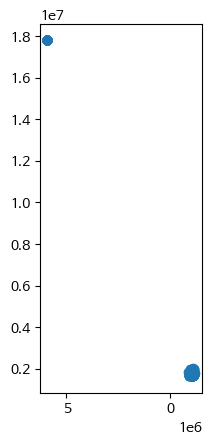

In [25]:
dure.plot()

In [11]:
시군구 = gpd.read_file('/content/gdrive/MyDrive/문화관광 빅데이터 공모전/전처리/SIG_202302/sig.shp', encoding='cp949')

시군구_코드 = pd.read_pickle('/content/gdrive/MyDrive/문화관광 빅데이터 공모전/전처리/시군구_코드_dict.pkl')

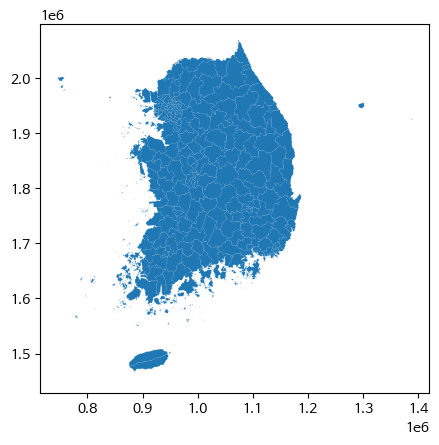

In [28]:
base = 시군구.plot()

In [ ]:
df_show = df.copy()
df_show['관광지역_시군구_코드'] = df_show['관광지역_시군구'].apply(lambda x: 시군구_코드[x])
df_show = gpd.GeoDataFrame(pd.merge(df_show, 시군구, how='left', left_on='관광지역_시군구_코드', right_on='SIG_CD').drop(['SIG_CD', 'SIG_ENG_NM'],axis=1))
df_show = gpd.GeoDataFrame(df_show)

In [ ]:
df_show = gpd.GeoDataFrame(df_show)

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds',
'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r',
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow',
 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',
 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm...

#### 1

<Axes: >

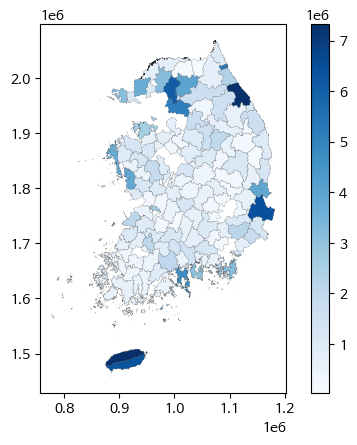

In [ ]:
df_show.plot(column='여행객수', cmap='Blues', linewidth=0.1, edgecolor='0.1', legend=True)

<Axes: >

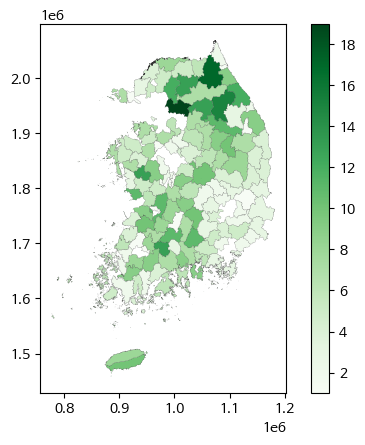

In [ ]:
df_show.plot(column='농촌마을_수', cmap='Greens', linewidth=0.1, edgecolor='0.2', legend=True)

<Axes: >

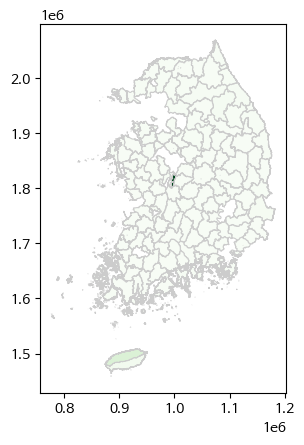

In [ ]:
df_show.plot(column='카드_50대_이용건수', cmap='Greens', linewidth=0.8, edgecolor='0.8')

In [ ]:
df['여행객수']

0      7312582.8
1      1021987.9
2      1179949.5
3      1637981.3
4      5271753.4
         ...    
137    1578259.0
138     110215.8
139     254616.7
140     986686.2
141     972803.9
Name: 여행객수, Length: 142, dtype: float64

In [ ]:
df[['관광지역_시군구', '여행객수']].sort_values(by='여행객수').head(10)

,관광지역_시군구,여행객수
116,충남 계룡시,28196.3
62,경북 영양군,92723.6
5,강원 양구군,106350.9
138,충북 증평군,110215.8
110,전북 장수군,145740.1
16,강원 화천군,147765.2
109,전북 임실군,174388.3
70,경북 칠곡군,182012.4
74,대전 동구,186127.6
67,경북 의성군,190462.2


In [ ]:
df[['관광지역_시군구', '여행객수']].sort_values(by='여행객수', ascending=False).head(10)

,관광지역_시군구,여행객수
115,제주 제주시,7338878.3
0,강원 강릉시,7312582.8
51,경북 경주시,6447950.6
114,제주 서귀포시,6352588.7
18,경기 가평군,6080175.2
4,강원 속초시,5271753.4
22,경기 양평군,5121680.5
91,전남 여수시,4717335.2
12,강원 춘천시,4017675.4
71,경북 포항시,3958791.7


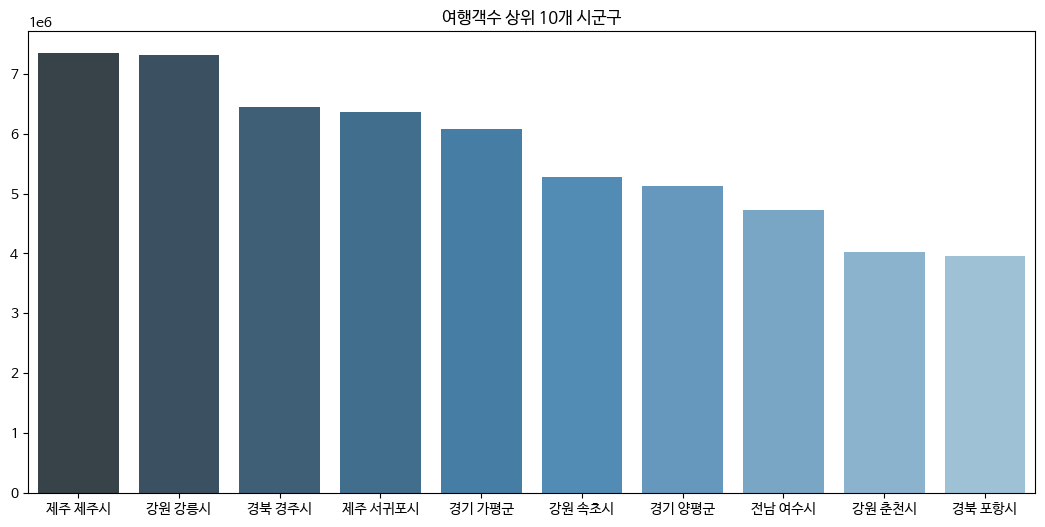

In [ ]:
fig = plt.figure(figsize=(13, 6))
plt.title('여행객수 상위 10개 시군구')
pal = sns.color_palette("Blues_d", 10)
sns.barplot(x = df[['관광지역_시군구', '여행객수']].sort_values(by='여행객수', ascending=False).head(10)['관광지역_시군구'].values, y = df[['관광지역_시군구', '여행객수']].sort_values(by='여행객수', ascending=False).head(10)['여행객수'].values, palette=pal[::-1])
plt.show()

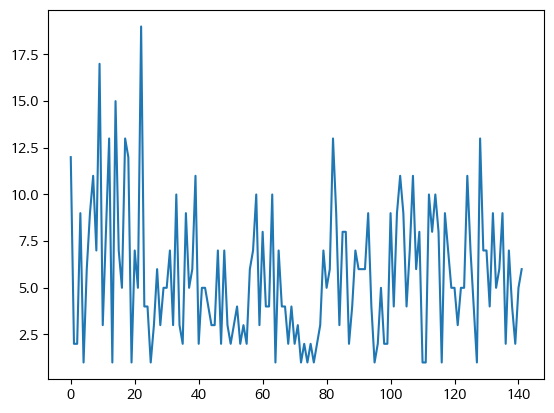

In [ ]:
plt.plot(df['농촌마을_수'])

In [ ]:
df.sort_values(by='농촌마을_수', ascending=False)[['관광지역_시군구', '농촌마을_수']].head(10)

,관광지역_시군구,농촌마을_수
22,경기 양평군,19
9,강원 인제군,17
14,강원 평창군,15
17,강원 횡성군,13
128,충남 청양군,13
82,전남 곡성군,13
12,강원 춘천시,13
0,강원 강릉시,12
18,경기 가평군,12
7,강원 영월군,11


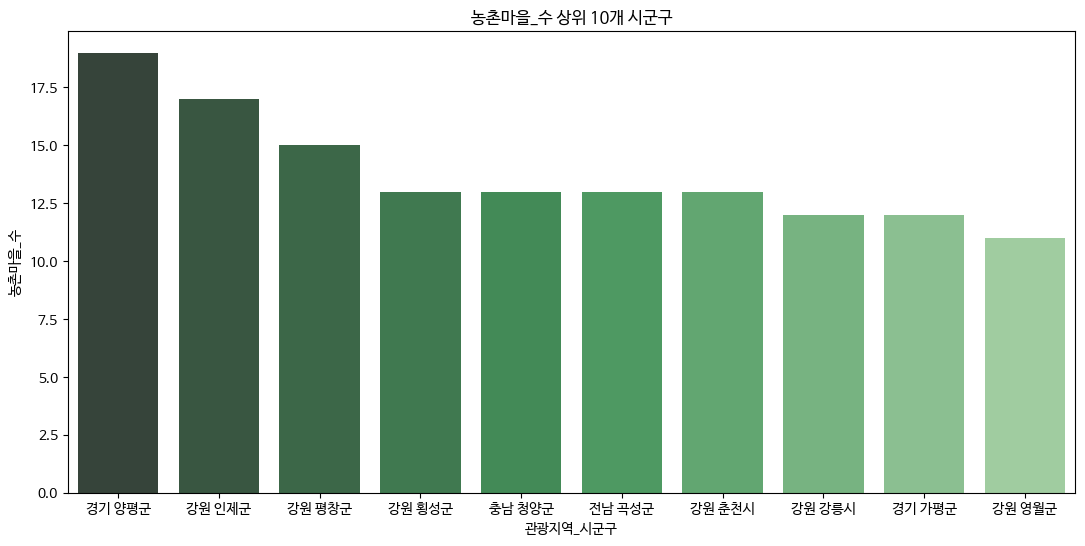

In [ ]:
fig = plt.figure(figsize=(13, 6))
plt.title('농촌마을_수 상위 10개 시군구')
pal = sns.color_palette("Greens_d", 10)
sns.barplot(x =df.sort_values(by='농촌마을_수', ascending=False)[['관광지역_시군구', '농촌마을_수']].head(10)['관광지역_시군구'] , y = df.sort_values(by='농촌마을_수', ascending=False)[['관광지역_시군구', '농촌마을_수']].head(10)['농촌마을_수'], palette=pal[::-1])
plt.show()

In [ ]:
# 만족도 측면에서 인기지역

In [ ]:
df.iloc[:, 19:32].sum(axis='columns')

0      54.19
1      54.00
2      53.40
3      55.18
4      54.22
       ...  
137    54.94
138    54.90
139    53.10
140    53.32
141    54.59
Length: 142, dtype: float64

In [ ]:
df['만족도_총'] = df.iloc[:, 19:32].sum(axis='columns')

In [ ]:
df_show.sort_values('만족도_총', ascending=False).head(10)

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수,만족도_총
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,1147478.0,1567237.0,1434881.0,...,4.19,4.19,4.26,3.80,3.94,4.12,4.01,160474.0,7312582.8,54.19
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,236627.0,1009571.0,1255043.0,...,4.19,4.18,4.14,3.81,4.01,4.10,4.08,163526.0,1021987.9,54.00
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,91003.0,163857.0,260025.0,...,4.22,4.08,3.93,3.78,4.13,4.00,3.92,126167.0,1179949.5,53.40
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,143917.0,601522.0,747283.0,...,4.32,4.23,4.23,3.88,4.15,4.16,4.03,139689.0,1637981.3,55.18
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,481591.0,1122668.0,1345131.0,...,4.18,4.16,4.23,3.86,4.02,4.07,4.04,174524.0,5271753.4,54.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,충북 제천시,7,1.714,3.000,1.833,1.750,0,264708.0,753039.0,655702.0,...,4.24,4.23,4.24,4.01,4.12,4.08,4.04,109573.0,1578259.0,54.94
138,충북 증평군,4,2.000,2.000,2.000,1.667,0,56600.0,320735.0,256707.0,...,4.36,4.29,4.33,3.71,4.27,4.00,4.00,81672.0,110215.8,54.90
139,충북 진천군,2,1.500,1.996,1.500,2.000,0,42046.0,75275.0,100083.0,...,4.07,4.04,4.29,3.93,3.97,4.13,4.03,71794.0,254616.7,53.10
140,충북 청주시,5,2.250,2.000,2.600,3.000,0,796993.0,826937.0,812536.0,...,4.13,4.21,4.16,3.88,4.02,3.95,3.85,81015.0,986686.2,53.32


In [ ]:
df_show = df.copy()
df_show['관광지역_시군구_코드'] = df_show['관광지역_시군구'].apply(lambda x: 시군구_코드[x])
df_show = gpd.GeoDataFrame(pd.merge(df_show, 시군구, how='left', left_on='관광지역_시군구_코드', right_on='SIG_CD').drop(['SIG_CD', 'SIG_ENG_NM'],axis=1))
df_show = gpd.GeoDataFrame(df_show)

<Axes: >

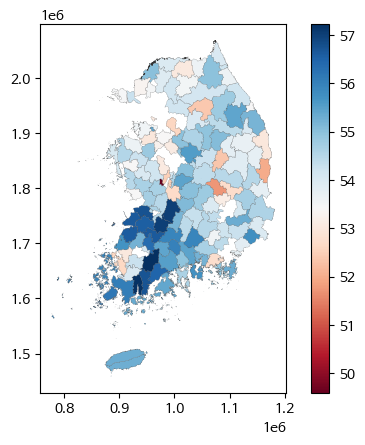

In [ ]:
df_show.plot(column='만족도_총',cmap='RdBu', linewidth=0.1, edgecolor='0.2', legend=True)

<Axes: >

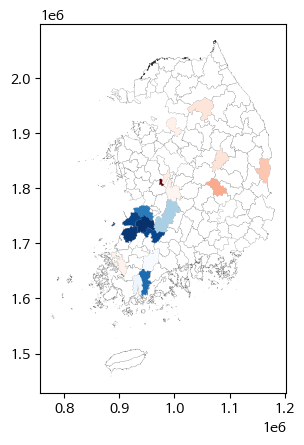

In [ ]:
base = df_show.plot(color='white', linewidth=0.1, edgecolor='0.2')
df_show.sort_values('만족도_총', ascending=False).head(10).plot(ax=base, column='만족도_총', cmap='Blues_r')
df_show.sort_values('만족도_총').head(10).plot(ax=base, column='만족도_총', cmap='Reds_r')

#### 2.

In [ ]:
df = pd.read_pickle('/content/gdrive/MyDrive/문화관광 빅데이터 공모전/대참사/최종클러스터링2.pkl')

##### 0번 클러스터

In [ ]:
df[df['cluster'] == 3]['관광지역_시군구'].values

array(['강원 영월군', '강원 태백시', '경기 김포시', '경기 여주시', '경기 오산시', '경남 거창군',
       '경남 김해시', '경남 사천시', '경남 진주시', '경남 창녕군', '경남 하동군', '경남 함양군',
       '경남 합천군', '경북 경산시', '경북 고령군', '경북 김천시', '경북 문경시', '경북 상주시',
       '경북 성주군', '경북 안동시', '경북 영양군', '경북 영주시', '경북 영천시', '경북 청송군',
       '광주 북구', '대전 대덕구', '대전 동구', '전남 광양시', '전남 나주시', '제주 서귀포시',
       '제주 제주시', '충남 공주시', '충남 논산시', '충남 부여군', '충남 서산시', '충북 괴산군',
       '충북 보은군', '충북 영동군', '충북 음성군', '충북 증평군', '충북 충주시'], dtype=object)

In [ ]:
df[df['cluster'] == 0].mean()

농촌마을_수               4.363636
농촌마을_체험_평균등급         1.660636
농촌마을_교육_평균등급         1.907909
농촌마을_숙박_평균등급         2.024121
농촌마을_음식_평균등급         1.789333
농촌마을_으뜸촌_선정수         0.121212
카드_20대_이용건수     174190.606061
카드_30대_이용건수     383358.000000
카드_40대_이용건수     379582.242424
카드_50대_이용건수     218436.484848
카드_60대_이용건수     123932.272727
카드_관광쇼핑_이용건수     45590.666667
카드_교통_이용건수       15432.931034
카드_숙박_이용건수      702033.303030
카드_여행사_이용건수      30035.500000
카드_체험_이용건수      498793.636364
카드_주말_이용건수      639619.848485
카드_평일_이용건수      639879.757576
자연경관                 4.373939
문화유산                 4.143333
교통                   4.102424
숙박시설                 4.192813
식당및음식                4.110000
쇼핑                   4.074848
관광지편의시설              4.103636
관광종사자의친절성            4.112727
체험프로그램               4.118182
관광지물가                3.828788
관광지혼잡도               4.012727
재방문의도                3.976364
타인추천의도               3.923939
평균인당비용           80813.939394
여행객수            814068.893939
cluster   

In [ ]:
df

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수,cluster
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,1147478.0,1567237.0,1434881.0,...,4.19,4.19,4.26,3.80,3.94,4.12,4.01,160474.0,7312582.8,2
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,236627.0,1009571.0,1255043.0,...,4.19,4.18,4.14,3.81,4.01,4.10,4.08,163526.0,1021987.9,2
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,91003.0,163857.0,260025.0,...,4.22,4.08,3.93,3.78,4.13,4.00,3.92,126167.0,1179949.5,2
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,143917.0,601522.0,747283.0,...,4.32,4.23,4.23,3.88,4.15,4.16,4.03,139689.0,1637981.3,2
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,481591.0,1122668.0,1345131.0,...,4.18,4.16,4.23,3.86,4.02,4.07,4.04,174524.0,5271753.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,264708.0,753039.0,655702.0,...,4.24,4.23,4.24,4.01,4.12,4.08,4.04,109573.0,1578259.0,2
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,56600.0,320735.0,256707.0,...,4.36,4.29,4.33,3.71,4.27,4.00,4.00,81672.0,110215.8,3
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,42046.0,75275.0,100083.0,...,4.07,4.04,4.29,3.93,3.97,4.13,4.03,71794.0,254616.7,0
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,796993.0,826937.0,812536.0,...,4.13,4.21,4.16,3.88,4.02,3.95,3.85,81015.0,986686.2,0


In [ ]:
시군구 = gpd.read_file('/content/gdrive/MyDrive/문화관광 빅데이터 공모전/전처리/SIG_202302/sig.shp', encoding='cp949')

시군구_코드 = pd.read_pickle('/content/gdrive/MyDrive/문화관광 빅데이터 공모전/전처리/시군구_코드_dict.pkl')

In [ ]:
df['관광지역_시군구_코드'] = df['관광지역_시군구'].apply(lambda x: 시군구_코드[x])
df = gpd.GeoDataFrame(pd.merge(df, 시군구, how='left', left_on='관광지역_시군구_코드', right_on='SIG_CD').drop(['SIG_CD', 'SIG_ENG_NM'],axis=1))

<Axes: >

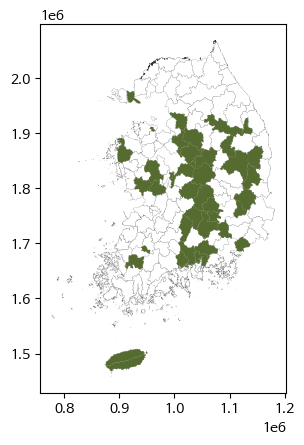

In [ ]:
base = df.plot(color='white',linewidth=0.1, edgecolor='0.2')
df[df['cluster']==3].plot(ax=base, color='darkolivegreen')
시군구[시군구['SIG_KOR_NM'].str.startswith('여주')].plot(ax=base, color='darkolivegreen')

In [ ]:
시군구[시군구['SIG_KOR_NM'].str.startswith('여주')]

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
113,41670,Yeoju-si,여주시,"POLYGON ((1001702.361 1937472.187, 1001797.089..."


In [ ]:
df[df['cluster']==3]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수,cluster,관광지역_시군구_코드,SIG_KOR_NM,geometry
7,강원 영월군,11,2.273,1.996,1.778,1.600,0,48529.0,133642.0,170912.0,...,4.05,4.08,4.09,3.97,113851.0,652247.1,3,42750,영월군,"POLYGON ((1068342.969 1934678.331, 1068367.270..."
13,강원 태백시,1,2.000,2.000,2.000,1.824,0,28115.0,42237.0,60302.0,...,3.81,3.97,3.94,3.80,103858.0,308564.3,3,42190,태백시,"POLYGON ((1133987.168 1927444.971, 1133980.895..."
19,경기 김포시,1,2.000,1.996,1.860,1.824,0,230676.0,402085.0,404728.0,...,4.08,4.16,3.94,3.90,58594.0,1124227.9,3,41570,김포시,"MULTIPOLYGON (((918342.597 1954626.063, 918318..."
23,경기 여주시,4,1.500,2.000,2.250,2.000,0,70441.0,179032.0,209355.0,...,3.96,4.12,4.12,3.99,115424.0,1338175.5,3,41730,NaN,None
25,경기 오산시,1,2.000,1.996,1.860,1.824,0,129865.0,242264.0,250364.0,...,4.19,4.23,3.96,3.87,82411.0,276210.2,3,41370,오산시,"POLYGON ((958045.182 1911397.377, 958056.659 1..."
33,경남 거창군,10,1.900,2.000,1.571,1.600,0,19561.0,29888.0,39613.0,...,3.93,4.03,3.98,4.02,79241.0,605811.5,3,48880,거창군,"POLYGON ((1034571.593 1767759.812, 1034559.208..."
35,경남 김해시,2,1.500,1.500,2.000,1.824,0,259908.0,337843.0,402191.0,...,3.98,4.14,4.02,3.96,88314.0,717363.0,3,48250,김해시,"POLYGON ((1123846.138 1711940.968, 1123874.672..."
38,경남 사천시,6,1.667,1.333,2.000,1.667,0,65428.0,232538.0,229491.0,...,3.95,3.98,4.21,4.02,105670.0,559764.1,3,48240,사천시,"MULTIPOLYGON (((1055795.202 1659004.828, 10557..."
42,경남 진주시,5,1.800,2.000,1.500,1.667,0,112763.0,153412.0,192353.0,...,3.97,4.03,4.08,3.99,85039.0,1208131.6,3,48170,진주시,"POLYGON ((1035294.781 1691525.417, 1035330.100..."
43,경남 창녕군,4,2.000,1.000,1.500,2.000,0,26857.0,239594.0,223426.0,...,3.94,4.13,3.95,3.88,60783.0,720203.5,3,48740,창녕군,"POLYGON ((1093201.453 1743463.757, 1093180.273..."


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/문화관광 빅데이터 공모전/전처리/한국농어촌공사_농촌관광등급결정현황_20220902.csv', encoding='cp949')
data

,시도,시군구,마을이름,선정연도,체험,교육,숙박,음식,체험1등급항목,교육1등급항목,숙박가족형등급항목,으뜸촌
0,강원,정선,365행복마을,2021,2,,1,2,NaN,NaN,가족형,N
1,강원,양양,38평화마을,2019,1,,1,,"만들기,문화,건강",NaN,가족형,N
2,강원,삼척,가온밸리(가곡온천휴양마을),2020,1,2,,,NaN,NaN,NaN,N
3,강원,춘천,강언덕부엉이마을,2020,2,,1,2,NaN,NaN,"가족형,단체형",N
4,강원,횡성,개나리마을,2019,2,,2,,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...
796,충북,옥천,햇다래마을,2020,2,,1,,NaN,NaN,"가족형,단체형",N
797,충북,옥천,향수뜰마을,2019,2,2,3,3,NaN,NaN,NaN,N
798,충북,영동,황금을따는마을,2021,3,,3,,NaN,NaN,NaN,N
799,충북,영동,흙진주포도체험마을,2019,,,2,,NaN,NaN,NaN,N


In [ ]:
data[data['시군구'] == '안성']

,시도,시군구,마을이름,선정연도,체험,교육,숙박,음식,체험1등급항목,교육1등급항목,숙박가족형등급항목,으뜸촌
155,경기,안성,미리내마을,2020,1,2,3,2,"농사,만들기",NaN,NaN,N
176,경기,안성,선비마을,2019,1,,,1,"만들기,문화",NaN,NaN,N
182,경기,안성,신기마을,2021,2,,,,NaN,NaN,NaN,N
191,경기,안성,용설호문화마을,2019,1,,2,,"농사,동물,만들기,문화",NaN,NaN,N
194,경기,안성,유별난마을,2021,3,3,3,3,NaN,NaN,NaN,N
196,경기,안성,인처동마을,2019,1,,,2,"농사,만들기",NaN,NaN,N
218,경기,안성,풍산개마을,2020,1,1,,,"농사,동물",교과연계,NaN,N


In [ ]:
data[data['시군구']=='양주']

,시도,시군구,마을이름,선정연도,체험,교육,숙박,음식,체험1등급항목,교육1등급항목,숙박가족형등급항목,으뜸촌
153,경기,양주,맹골마을,2020,1,1,,1,"농사,만들기,문화",교과연계,NaN,N
167,경기,양주,비암장수팜스테이마을,2020,2,,,3,NaN,NaN,NaN,N
201,경기,양주,전원일기마을,2020,2,2,,2,NaN,NaN,NaN,N
206,경기,양주,천생연분마을,2020,1,2,2,3,"농사,만들기",NaN,NaN,N
210,경기,양주,초록지기마을,2019,2,,,2,NaN,NaN,NaN,N


In [ ]:
data[data['시군구']=='용인']

,시도,시군구,마을이름,선정연도,체험,교육,숙박,음식,체험1등급항목,교육1등급항목,숙박가족형등급항목,으뜸촌
144,경기,용인,내동마을,2019,2,,,,NaN,NaN,NaN,N
186,경기,용인,연미향마을,2019,2,,,,NaN,NaN,NaN,N
219,경기,용인,학일마을,2020,1,2,,3,"농사,만들기",NaN,NaN,N


In [ ]:
data[data['시군구']=='이천']

,시도,시군구,마을이름,선정연도,체험,교육,숙박,음식,체험1등급항목,교육1등급항목,숙박가족형등급항목,으뜸촌
146,경기,이천,노승산우무실마을,2019,2,,2,2,NaN,NaN,NaN,N
150,경기,이천,도니울마을,2019,2,,,2,NaN,NaN,NaN,N
166,경기,이천,부래미마을,2020,1,1,,,"농사,만들기,문화",교과연계,NaN,N
173,경기,이천,서경들마을,2019,1,3,1,2,"농사,만들기",NaN,단체형,N
195,경기,이천,이천산수유마을,2020,1,2,1,1,"농사,만들기,문화",NaN,"가족형,단체형",N
197,경기,이천,자채방아마을,2019,1,,2,2,"농사,만들기,문화",NaN,NaN,N


In [ ]:
df[df['cluster']==0].sort_values(by='농촌마을_음식_평균등급')

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수,cluster,관광지역_시군구_코드,SIG_KOR_NM,geometry
76,대전 중구,1,1.000,1.000,1.000,1.000,1,244464.0,473919.0,370787.0,...,3.90,4.02,4.02,3.89,92784.0,514993.7,0,30140,중구,"POLYGON ((995945.175 1811588.887, 995945.178 1..."
17,강원 횡성군,13,1.462,1.500,1.875,1.000,1,170446.0,398745.0,681324.0,...,3.69,3.92,3.93,3.96,148250.0,341025.8,0,42730,횡성군,"POLYGON ((1022931.707 1944049.288, 1022936.092..."
70,경북 칠곡군,2,2.500,2.000,2.000,1.000,0,56647.0,180275.0,127550.0,...,3.27,3.86,3.82,4.00,56219.0,182012.4,0,47850,칠곡군,"POLYGON ((1089295.195 1792489.707, 1089337.031..."
87,전남 무안군,2,1.500,2.500,2.000,1.000,0,33447.0,44012.0,62737.0,...,4.04,4.09,3.87,3.78,98266.0,409208.3,0,46840,무안군,"MULTIPOLYGON (((899764.824 1651663.283, 899755..."
29,경기 평택시,5,1.600,1.996,2.000,1.000,0,385121.0,415176.0,451910.0,...,3.95,3.95,3.91,3.86,106635.0,659815.5,0,41220,평택시,"POLYGON ((940272.495 1883450.667, 940725.204 1..."
118,충남 금산군,7,2.000,1.500,1.800,1.200,0,10284.0,24772.0,31401.0,...,3.89,4.05,4.03,3.96,63546.0,750808.7,0,44710,금산군,"POLYGON ((988618.155 1808331.267, 988701.439 1..."
41,경남 의령군,5,1.250,2.500,1.800,1.250,0,2979.0,31236.0,27152.0,...,3.95,4.00,3.79,3.74,57482.0,230897.3,0,48720,의령군,"POLYGON ((1072035.199 1724895.285, 1072093.302..."
28,경기 파주시,3,1.333,2.000,1.500,1.333,0,384906.0,1135110.0,1051100.0,...,3.88,4.01,4.04,3.95,73721.0,3711333.3,0,41480,파주시,"POLYGON ((926029.845 1982607.318, 926030.368 1..."
57,경북 봉화군,7,1.857,1.500,1.667,1.500,1,7676.0,17619.0,29842.0,...,3.77,4.00,3.96,3.96,57736.0,218970.5,0,47920,봉화군,"POLYGON ((1103758.800 1872176.631, 1103733.713..."
130,충남 홍성군,7,1.571,1.667,2.200,1.500,0,25289.0,46939.0,86785.0,...,3.96,4.21,4.00,3.94,80384.0,496876.0,0,44800,홍성군,"MULTIPOLYGON (((906695.008 1844568.917, 906695..."


In [ ]:
a = gpd.GeoDataFrame(a)

In [ ]:
시군구[시군구['SIG_KOR_NM'].str.startswith('천안시')]


,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
149,44131,"Dongnam-gu, Cheonan-si",천안시 동남구,"POLYGON ((981821.389 1876846.713, 981931.111 1..."
150,44133,"Seobuk-gu, Cheonan-si",천안시 서북구,"POLYGON ((965794.161 1885898.909, 965821.523 1..."
